In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV đã trích xuất keypoint
df = pd.read_csv(r"D:\NLP_VSL\hand_keypoints_dataset_total.csv")


In [43]:

print(df['label'].unique())  # Toàn bộ nhãn
print(sorted(df['label'].unique()))  # Sắp xếp xem có ký tự lạ nào

# Gợi ý 1: Kiểm tra phân bố số lượng mẫu theo từng nhãn
label_counts = df['label'].value_counts().sort_index()



['A' 'B' 'C' 'D' 'E' 'G' 'H' 'I' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T'
 'U' 'V' 'X' 'Y' 'Đ']
['A', 'B', 'C', 'D', 'E', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'X', 'Y', 'Đ']


In [44]:


print("Số mẫu:", len(df))
print("Các nhãn lớp:", df['label'].unique())

# Tách nhãn và đặc trưng
X = df.drop('label', axis=1).values  # 63 đặc trưng (x0, y0, z0,...)
y = df['label'].values

# Mã hóa nhãn từ A,B,C,... thành số
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# --- Lưu encoder để dự đoán sau này ---
os.makedirs("saved_model", exist_ok=True)
joblib.dump(label_encoder, "saved_model/label_encoder.pkl")



Số mẫu: 45264
Các nhãn lớp: ['A' 'B' 'C' 'D' 'E' 'G' 'H' 'I' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T'
 'U' 'V' 'X' 'Y' 'Đ']


['saved_model/label_encoder.pkl']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    shuffle=True,
    random_state=42
)

In [46]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# joblib.dump(scaler, "saved_model/scaler.pkl")

In [47]:
print("Train:", X_train.shape)
print("Test:", X_test.shape)

Train: (36211, 63)
Test: (9053, 63)


In [48]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

svm_model = SVC(kernel='rbf', C=10, gamma=0.01, probability=False, random_state=42)
svm_model.fit(X_train, y_train)

# Lưu mô hình
joblib.dump(svm_model, "saved_model/svm_model.h5")

['saved_model/svm_model.h5']

In [51]:
y_pred = svm_model.predict(X_test)

print("\n--- Accuracy ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\n--- Classification Report ---")
print(classification_report(
    y_test, 
    y_pred, 
    target_names=label_encoder.classes_,
    digits=4   # hiển thị 4 chữ số sau dấu phẩy
))



--- Accuracy ---
Accuracy: 0.9901

--- Classification Report ---
              precision    recall  f1-score   support

           A     1.0000    0.9886    0.9943       352
           B     1.0000    1.0000    1.0000       439
           C     0.9306    1.0000    0.9640       268
           D     0.9662    0.9894    0.9777       376
           E     1.0000    1.0000    1.0000       442
           G     0.9977    0.9977    0.9977       439
           H     0.9931    0.9931    0.9931       434
           I     1.0000    0.9932    0.9966       443
           K     0.9978    0.9913    0.9945       460
           L     1.0000    0.9932    0.9966       442
           M     0.9568    0.9779    0.9673       272
           N     0.9515    0.9623    0.9568       265
           O     0.9973    0.9920    0.9947       376
           P     0.9947    0.9767    0.9856       386
           Q     0.9969    0.9939    0.9954       328
           R     0.9879    0.9556    0.9715       428
           S   

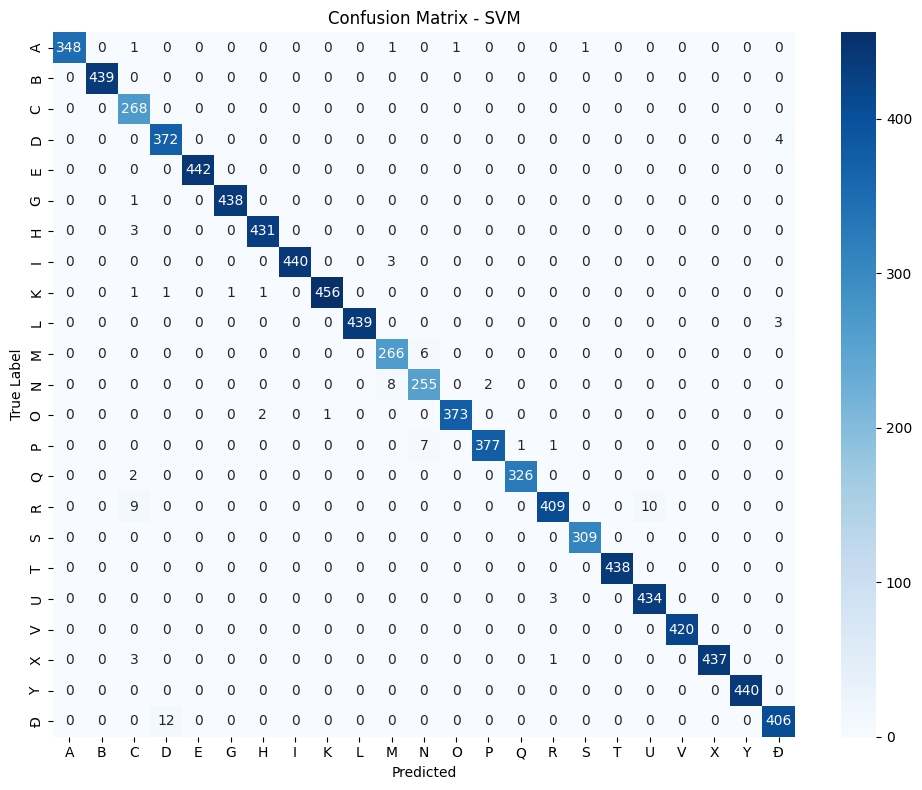

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.tight_layout()
plt.show()